## 3. 데이터 탐색적 분석 - EDA

`$ pip install plotly_express`

#### 3.2 데이터 읽기

In [33]:
import pandas as pd

titanic_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/titanic.xls'
titanic = pd.read_excel(titanic_url)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### 3.3 생존 상황

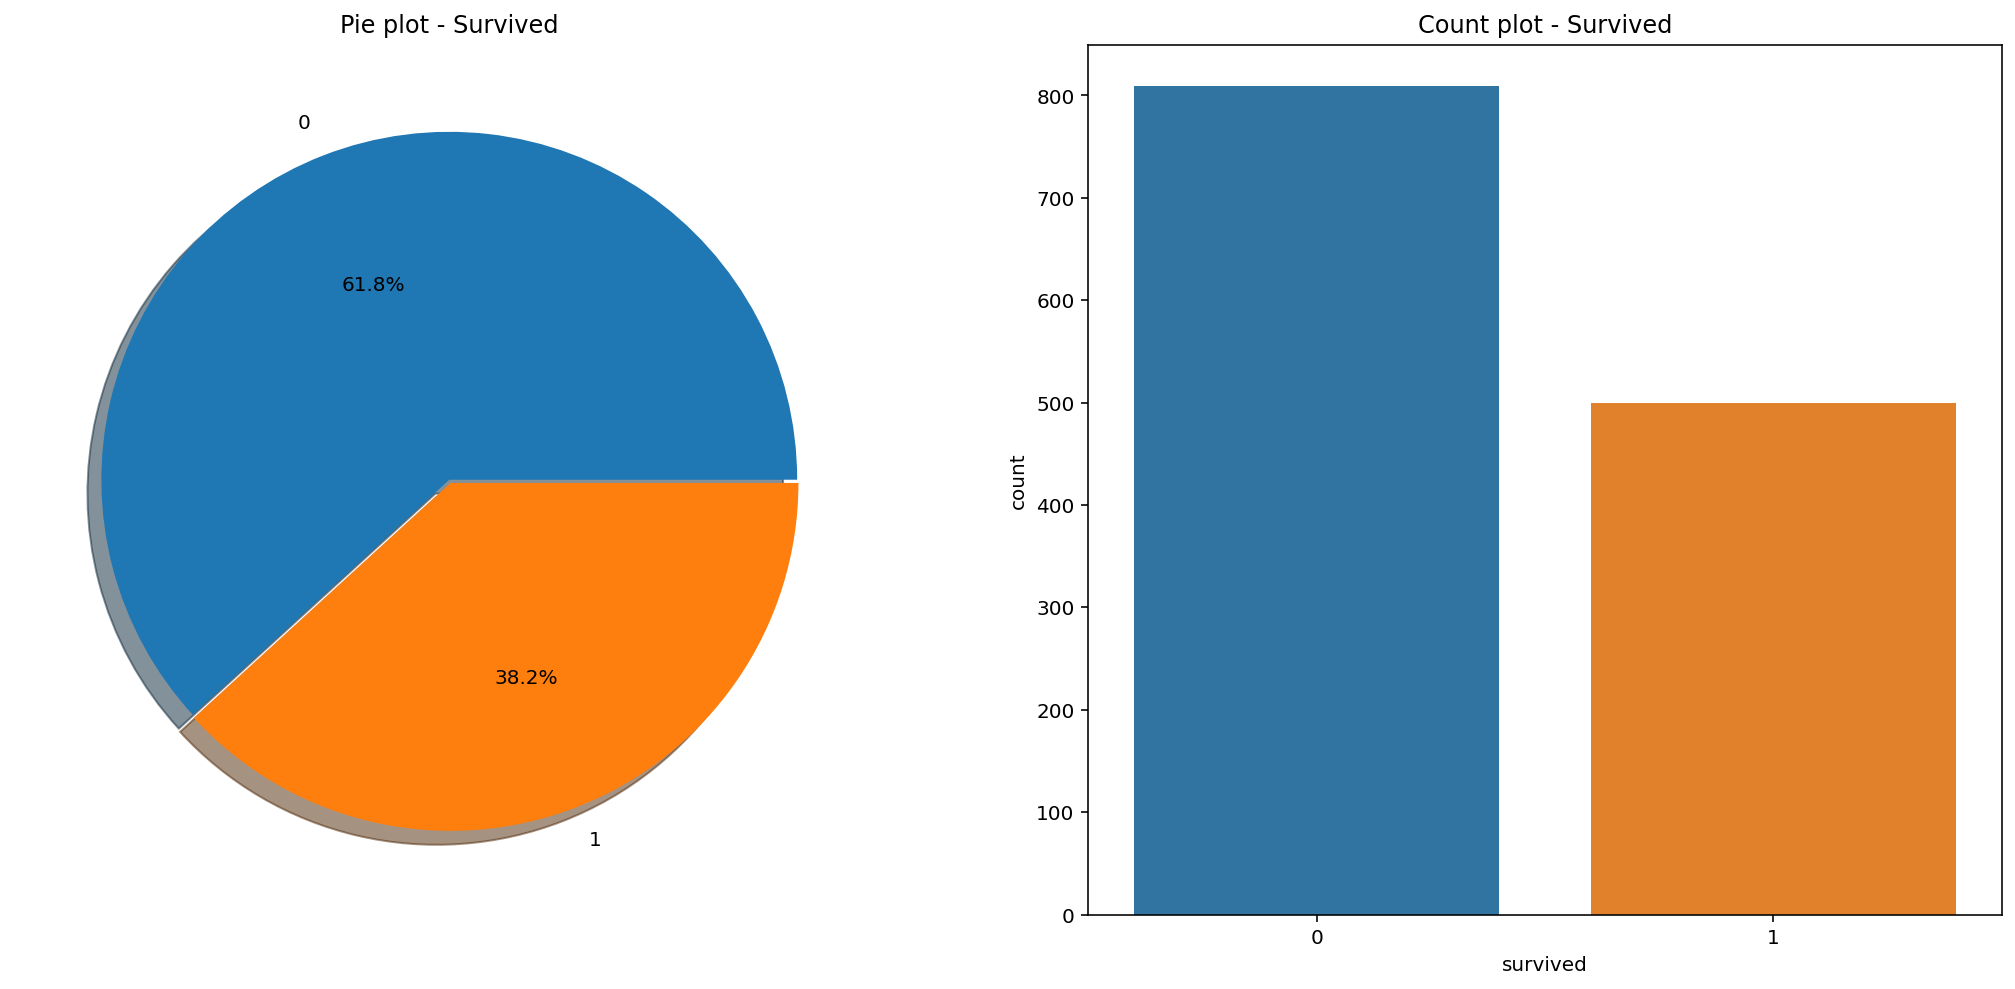

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

f, ax = plt.subplots(1, 2, figsize=(18, 8))

titanic['survived'].value_counts().plot.pie(explode=[0, 0.01],
                                           autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('survived', data=titanic, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

#### 3.5 성별에 따른 생존 상황은?

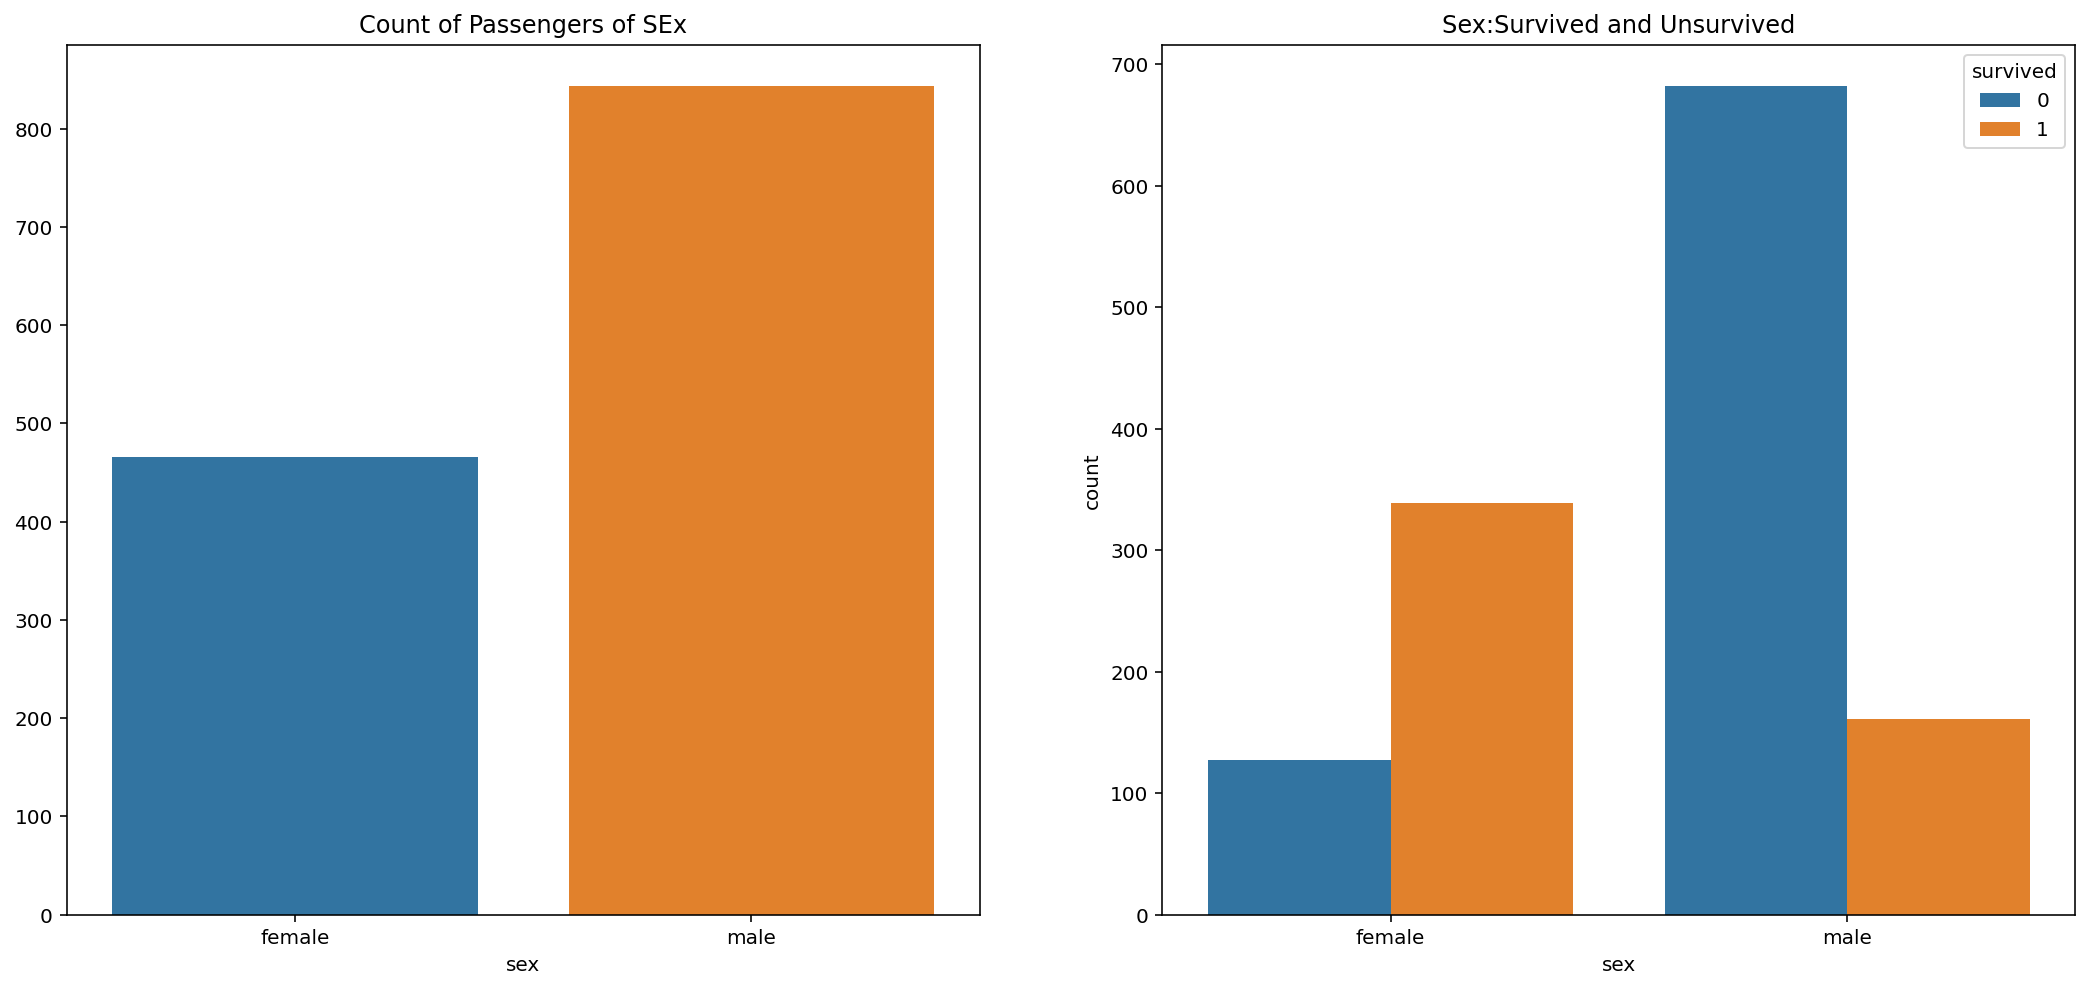

In [35]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.countplot('sex', data=titanic, ax=ax[0])
ax[0].set_title('Count of Passengers of SEx')
ax[0].set_ylabel('')

sns.countplot('sex', hue='survived', data=titanic, ax=ax[1])
ax[1].set_title('Sex:Survived and Unsurvived')

plt.show()

#### 3.7 경제력 대비 생존률

In [36]:
pd.crosstab(titanic['pclass'], titanic['survived'], margins=True)

survived,0,1,All
pclass,,,
1,123,200,323
2,158,119,277
3,528,181,709
All,809,500,1309


#### 3.8 선실 등급별 성별 상황

In [37]:
import seaborn as sns

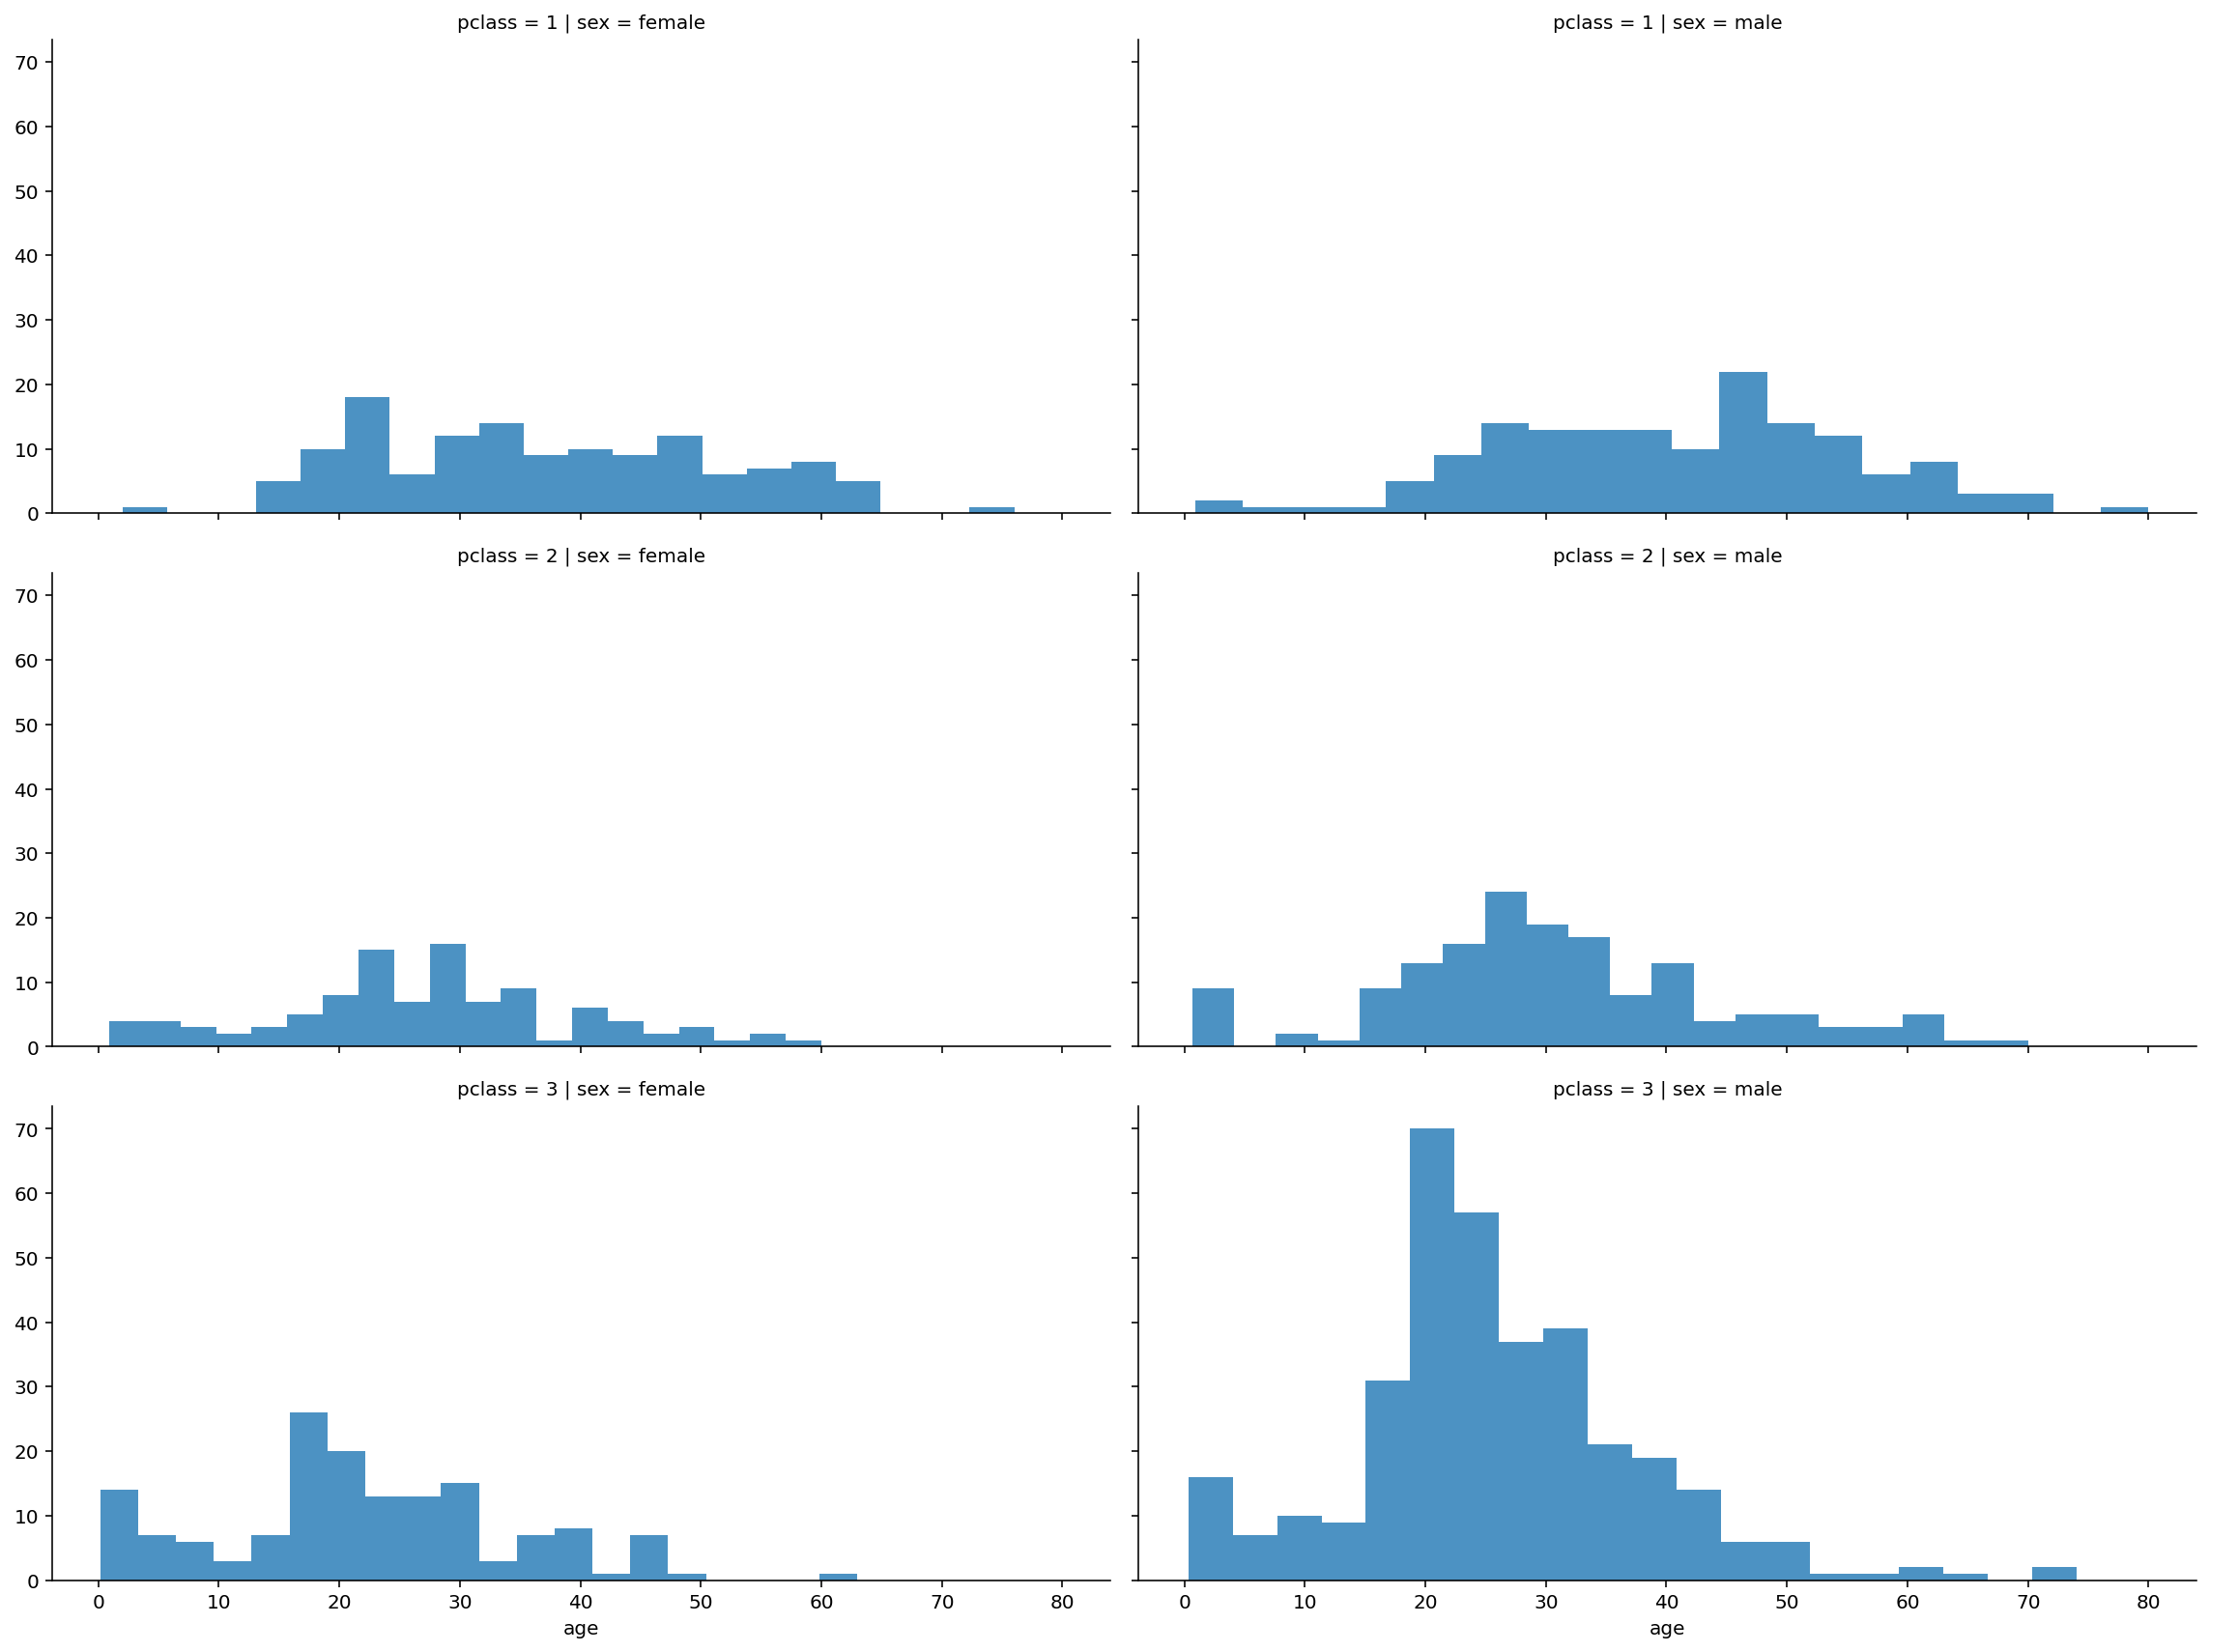

In [38]:
grid = sns.FacetGrid(titanic, row='pclass', col='sex', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=.8, bins=20)
grid.add_legend();

##3등실에는 특히 남성승객이 많았다~

#### 3.10 나이별 승객 현황을 알아보자

In [39]:
import plotly.express as px

fig = px.histogram(titanic, x="age")
fig.show()
##아이들과 20~30대가 많았다

#### 3.12 등실별 생존률을 연령별로 관찰해보자

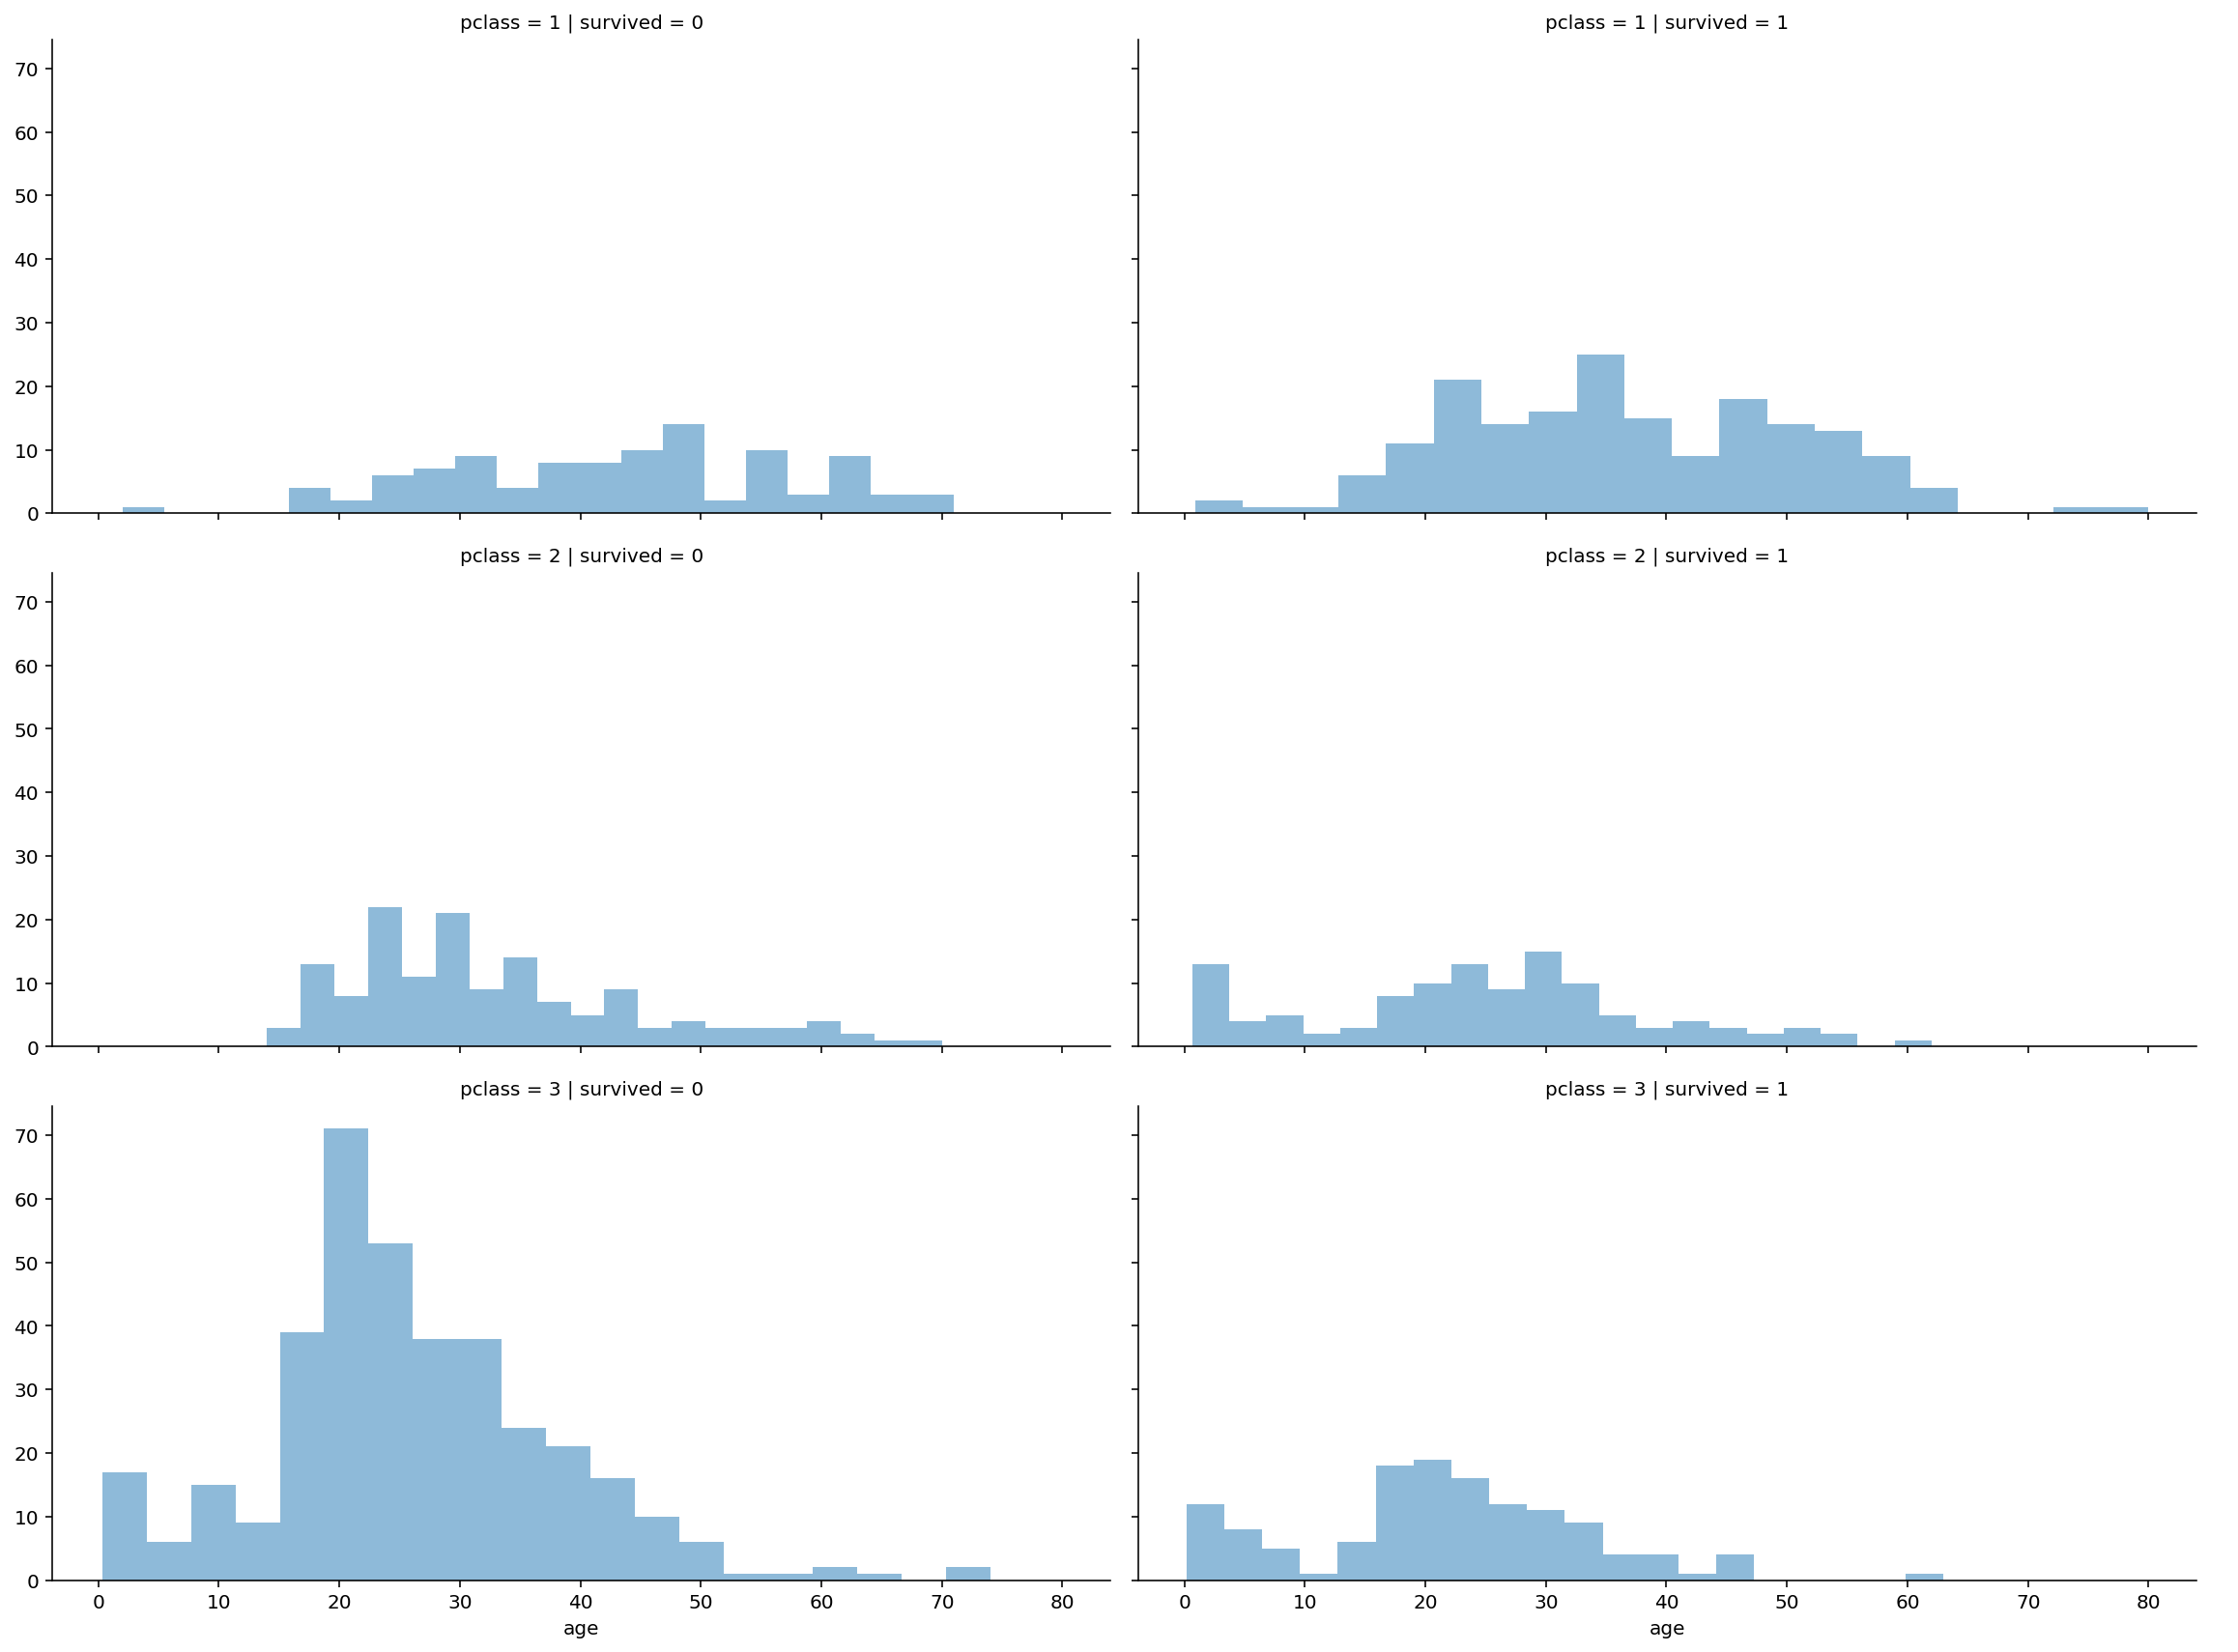

In [40]:
grid = sns.FacetGrid(titanic, col='survived', row='pclass', height=4, aspect=2)
grid.map(plt.hist, 'age', alpha=.5, bins=20)
grid.add_legend();

##선실등급이 높으면 생존률이 확실히 높은듯 하다

#### 3.14 나이를 5단계로 정리하기

In [41]:
titanic['age_cat'] = pd.cut(titanic['age'], bins=[0,7,15,30,60,100],
                           include_lowest=True,
                           labels=['baby', 'teen', 'young', 'adult', 'old'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young


#### 3.15 나이,성별,등급별 생존자 수를 한번에 파악할 수 있을까?

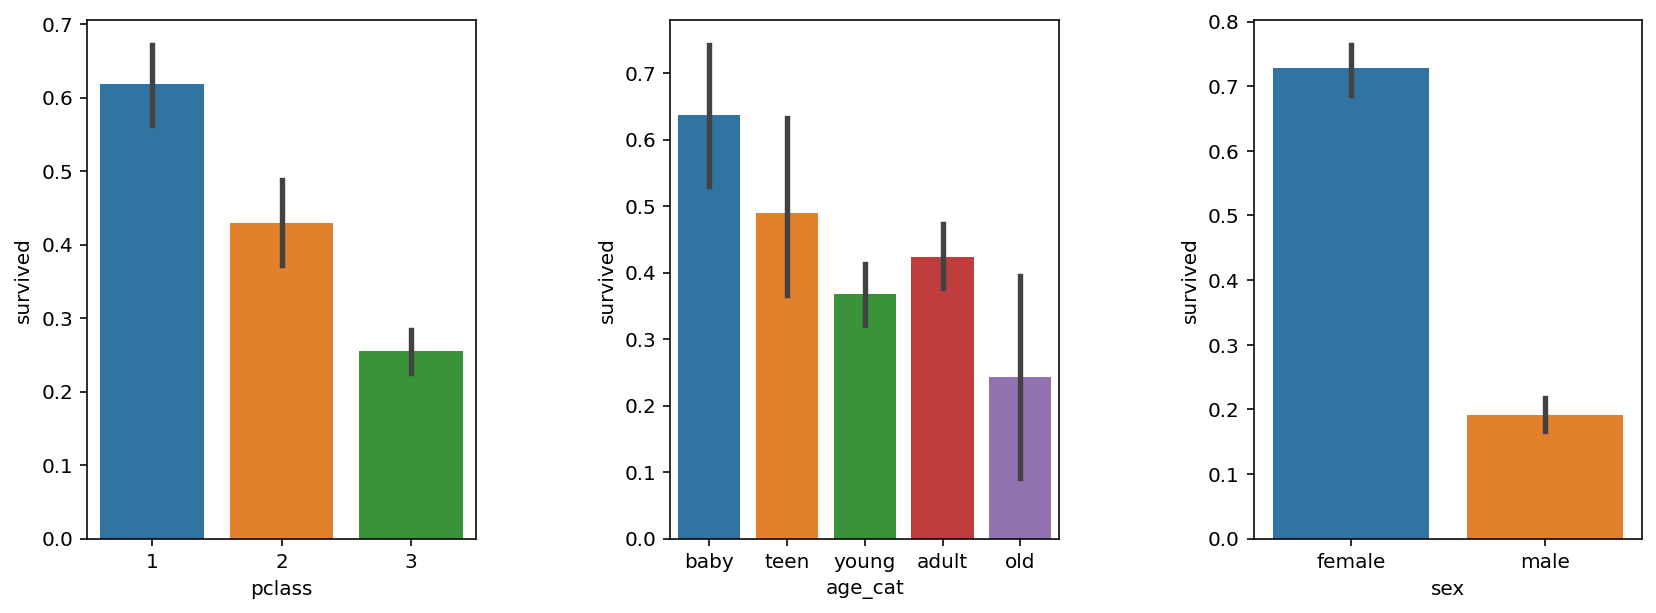

In [42]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sns.barplot('pclass', 'survived', data=titanic)
plt.subplot(132)
sns.barplot('age_cat', 'survived', data=titanic)
plt.subplot(133)
sns.barplot('sex', 'survived', data=titanic)
plt.subplots_adjust(top=1, bottom=0.1, left=0.1, right=1, hspace=0.5, wspace=0.5)

#### 3.17 남/여 나이별 생존 상황을 보다 더 들여다 보자

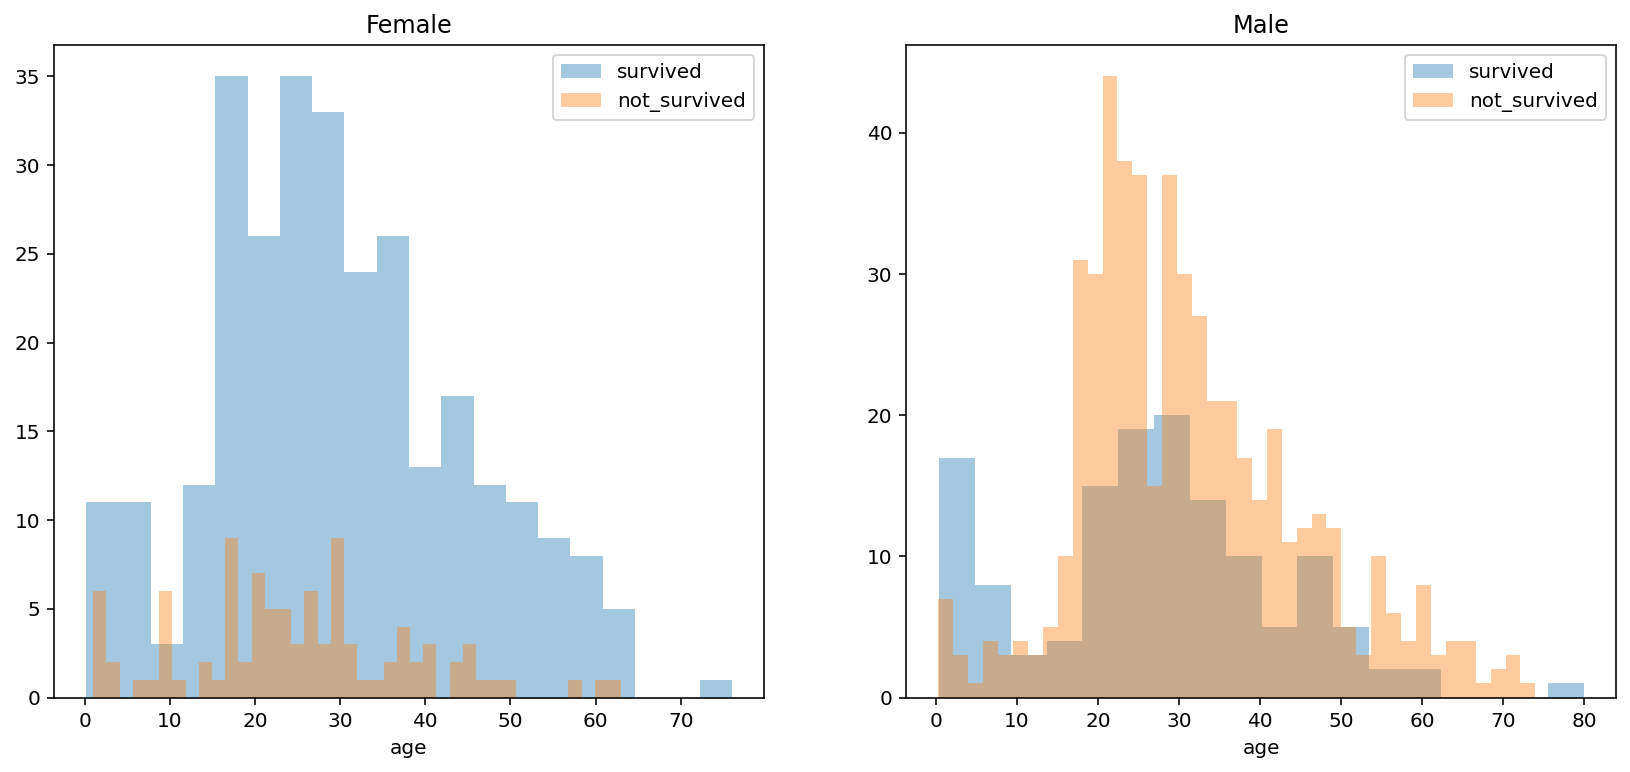

In [43]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))

women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']

ax = sns.distplot(women[women['survived']==1]['age'], bins=20,
                 label = 'survived', ax = axes[0], kde=False)
ax = sns.distplot(women[women['survived']==0]['age'], bins=40,
                 label = 'not_survived', ax = axes[0], kde=False)
ax.legend(); ax.set_title('Female')

ax = sns.distplot(men[men['survived']==1]['age'], bins=18,
                 label = 'survived', ax = axes[1], kde=False)
ax = sns.distplot(men[men['survived']==0]['age'], bins=40,
                 label = 'not_survived', ax = axes[1], kde=False)
ax.legend(); ax = ax.set_title('Male')

#### 3.19 탑승객의 이름에서 신분을 알 수 있다

In [44]:
for idx, dataset in titanic.iterrows():
    print(dataset['name'])

Allen, Miss. Elisabeth Walton
Allison, Master. Hudson Trevor
Allison, Miss. Helen Loraine
Allison, Mr. Hudson Joshua Creighton
Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Anderson, Mr. Harry
Andrews, Miss. Kornelia Theodosia
Andrews, Mr. Thomas Jr
Appleton, Mrs. Edward Dale (Charlotte Lamson)
Artagaveytia, Mr. Ramon
Astor, Col. John Jacob
Astor, Mrs. John Jacob (Madeleine Talmadge Force)
Aubart, Mme. Leontine Pauline
Barber, Miss. Ellen "Nellie"
Barkworth, Mr. Algernon Henry Wilson
Baumann, Mr. John D
Baxter, Mr. Quigg Edmond
Baxter, Mrs. James (Helene DeLaudeniere Chaput)
Bazzani, Miss. Albina
Beattie, Mr. Thomson
Beckwith, Mr. Richard Leonard
Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
Behr, Mr. Karl Howell
Bidois, Miss. Rosalie
Bird, Miss. Ellen
Birnbaum, Mr. Jakob
Bishop, Mr. Dickinson H
Bishop, Mrs. Dickinson H (Helen Walton)
Bissette, Miss. Amelia
Bjornstrom-Steffansson, Mr. Mauritz Hakan
Blackwell, Mr. Stephen Weart
Blank, Mr. Henry
Bonnell, Miss. Caroline
Bonnell, Miss

Nasser, Mrs. Nicholas (Adele Achem)
Navratil, Master. Edmond Roger
Navratil, Master. Michel M
Navratil, Mr. Michel ("Louis M Hoffman")
Nesson, Mr. Israel
Nicholls, Mr. Joseph Charles
Norman, Mr. Robert Douglas
Nourney, Mr. Alfred ("Baron von Drachstedt")
Nye, Mrs. (Elizabeth Ramell)
Otter, Mr. Richard
Oxenham, Mr. Percy Thomas
Padro y Manent, Mr. Julian
Pain, Dr. Alfred
Pallas y Castello, Mr. Emilio
Parker, Mr. Clifford Richard
Parkes, Mr. Francis "Frank"
Parrish, Mrs. (Lutie Davis)
Pengelly, Mr. Frederick William
Pernot, Mr. Rene
Peruschitz, Rev. Joseph Maria
Phillips, Miss. Alice Frances Louisa
Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")
Phillips, Mr. Escott Robert
Pinsky, Mrs. (Rosa)
Ponesell, Mr. Martin
Portaluppi, Mr. Emilio Ilario Giuseppe
Pulbaum, Mr. Franz
Quick, Miss. Phyllis May
Quick, Miss. Winifred Vera
Quick, Mrs. Frederick Charles (Jane Richards)
Reeves, Mr. David
Renouf, Mr. Peter Henry
Renouf, Mrs. Peter Henry (Lillian Jefferys)
Reynaldo, Ms. Enc

Lefebre, Miss. Mathilde
Lefebre, Mrs. Frank (Frances)
Leinonen, Mr. Antti Gustaf
Lemberopolous, Mr. Peter L
Lennon, Miss. Mary
Lennon, Mr. Denis
Leonard, Mr. Lionel
Lester, Mr. James
Lievens, Mr. Rene Aime
Lindahl, Miss. Agda Thorilda Viktoria
Lindblom, Miss. Augusta Charlotta
Lindell, Mr. Edvard Bengtsson
Lindell, Mrs. Edvard Bengtsson (Elin Gerda Persson)
Lindqvist, Mr. Eino William
Linehan, Mr. Michael
Ling, Mr. Lee
Lithman, Mr. Simon
Lobb, Mr. William Arthur
Lobb, Mrs. William Arthur (Cordelia K Stanlick)
Lockyer, Mr. Edward
Lovell, Mr. John Hall ("Henry")
Lulic, Mr. Nikola
Lundahl, Mr. Johan Svensson
Lundin, Miss. Olga Elida
Lundstrom, Mr. Thure Edvin
Lyntakoff, Mr. Stanko
MacKay, Mr. George William
Madigan, Miss. Margaret "Maggie"
Madsen, Mr. Fridtjof Arne
Maenpaa, Mr. Matti Alexanteri
Mahon, Miss. Bridget Delia
Mahon, Mr. John
Maisner, Mr. Simon
Makinen, Mr. Kalle Edvard
Mamee, Mr. Hanna
Mangan, Miss. Mary
Mannion, Miss. Margareth
Mardirosian, Mr. Sarkis
Markoff, Mr. Marin
Marku

#### 3.20 정규식을 이용해서 문장 사이의 신분에 대한 정보를 얻을 수 있다

In [47]:
import re

for idx, dataset in titanic.iterrows():
    tmp = dataset['name']
    print(idx)
    print(re.search('\,\s\w+(\s\w+)?\.', tmp).group())
    
# .group() : 글자를 반환한다

0
, Miss.
1
, Master.
2
, Miss.
3
, Mr.
4
, Mrs.
5
, Mr.
6
, Miss.
7
, Mr.
8
, Mrs.
9
, Mr.
10
, Col.
11
, Mrs.
12
, Mme.
13
, Miss.
14
, Mr.
15
, Mr.
16
, Mr.
17
, Mrs.
18
, Miss.
19
, Mr.
20
, Mr.
21
, Mrs.
22
, Mr.
23
, Miss.
24
, Miss.
25
, Mr.
26
, Mr.
27
, Mrs.
28
, Miss.
29
, Mr.
30
, Mr.
31
, Mr.
32
, Miss.
33
, Miss.
34
, Mr.
35
, Miss.
36
, Miss.
37
, Mr.
38
, Mr.
39
, Mr.
40
, Dr.
41
, Mrs.
42
, Mrs.
43
, Mrs.
44
, Miss.
45
, Major.
46
, Mr.
47
, Mr.
48
, Mrs.
49
, Mr.
50
, Mrs.
51
, Mr.
52
, Mr.
53
, Mr.
54
, Master.
55
, Miss.
56
, Mr.
57
, Mrs.
58
, Mr.
59
, Mrs.
60
, Mr.
61
, Mrs.
62
, Mr.
63
, Mrs.
64
, Mr.
65
, Mrs.
66
, Miss.
67
, Miss.
68
, Mr.
69
, Mrs.
70
, Mr.
71
, Mr.
72
, Mrs.
73
, Miss.
74
, Mr.
75
, Mr.
76
, Miss.
77
, Mr.
78
, Mrs.
79
, Mrs.
80
, Mr.
81
, Capt.
82
, Miss.
83
, Mrs.
84
, Mr.
85
, Mrs.
86
, Mr.
87
, Mr.
88
, Miss.
89
, Mr.
90
, Mrs.
91
, Mr.
92
, Mrs.
93
, Dr.
94
, Master.
95
, Mrs.
96
, Mr.
97
, Mrs.
98
, Mrs.
99
, Lady.
100
, Sir.
101
, Mr.
1

, Mr.
822
, Mr.
823
, Mrs.
824
, Mr.
825
, Master.
826
, Master.
827
, Master.
828
, Miss.
829
, Miss.
830
, Mr.
831
, Mr.
832
, Mrs.
833
, Mr.
834
, Mr.
835
, Mr.
836
, Mr.
837
, Mr.
838
, Mr.
839
, Mr.
840
, Miss.
841
, Miss.
842
, Mr.
843
, Mr.
844
, Mr.
845
, Mrs.
846
, Mr.
847
, Mr.
848
, Mr.
849
, Mr.
850
, Mr.
851
, Mrs.
852
, Miss.
853
, Mr.
854
, Mr.
855
, Mr.
856
, Miss.
857
, Mr.
858
, Mr.
859
, Miss.
860
, Miss.
861
, Miss.
862
, Miss.
863
, Mr.
864
, Miss.
865
, Miss.
866
, Miss.
867
, Mrs.
868
, Mr.
869
, Mr.
870
, Miss.
871
, Mr.
872
, Miss.
873
, Mr.
874
, Mr.
875
, Mr.
876
, Mr.
877
, Miss.
878
, Miss.
879
, Mr.
880
, Mr.
881
, Mr.
882
, Mr.
883
, Mr.
884
, Mr.
885
, Mr.
886
, Miss.
887
, Mr.
888
, Mr.
889
, Mr.
890
, Mr.
891
, Mr.
892
, Mr.
893
, Mr.
894
, Master.
895
, Miss.
896
, Mr.
897
, Mr.
898
, Mr.
899
, Mrs.
900
, Master.
901
, Miss.
902
, Mr.
903
, Mrs.
904
, Mr.
905
, Mr.
906
, Mr.
907
, Miss.
908
, Miss.
909
, Mr.
910
, Mr.
911
, Mr.
912
, Mr.
913
, Mr.
914

#### 3.21 살짝 응용하면 -> 사회적 신분만 얻을 수 있다

In [49]:
import re

title = []
for idx, dataset in titanic.iterrows():
    title.append(re.search('\,\s\w+(\s\w+)?\.', dataset['name']).group()[2:-1])
    
titanic['title'] = title
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs


#### 3.23 성별별로 본 귀족

In [50]:
pd.crosstab(titanic['title'], titanic['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,61


#### 3.24 사회적 신분을 조금더 정리하자

In [51]:
titanic['title'] = titanic['title'].replace('Mlle', "Miss")
titanic['title'] = titanic['title'].replace('Ms', "Miss")
titanic['title'] = titanic['title'].replace('Mme', "Mrs")

Rare_f = ['Dona', 'Dr', 'Lady', 'the Countess']

Rare_m = ['Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Master']

for each in Rare_f:
    titanic['title'] = titanic['title'].replace(each, 'Rare_f')
    
for each in Rare_m:
    titanic['title'] = titanic['title'].replace(each, 'Rare_m')
    
titanic['title'].unique()

array(['Miss', 'Rare_m', 'Mr', 'Mrs', 'Rare_f'], dtype=object)

#### 3.25 이 결과는 또 어떻게 해석할 수 있을까

In [52]:
titanic[['title', 'survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Miss,0.678030
1,Mr,0.162483
2,Mrs,0.787879
3,Rare_f,0.636364
4,Rare_m,0.443038


## 4. 머신러닝을 이용한 생존자 예측

#### 4.1 간단히 구조확인

In [53]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   int64   
 1   survived   1309 non-null   int64   
 2   name       1309 non-null   object  
 3   sex        1309 non-null   object  
 4   age        1046 non-null   float64 
 5   sibsp      1309 non-null   int64   
 6   parch      1309 non-null   int64   
 7   ticket     1309 non-null   object  
 8   fare       1308 non-null   float64 
 9   cabin      295 non-null    object  
 10  embarked   1307 non-null   object  
 11  boat       486 non-null    object  
 12  body       121 non-null    float64 
 13  home.dest  745 non-null    object  
 14  age_cat    1046 non-null   category
 15  title      1309 non-null   object  
dtypes: category(1), float64(3), int64(4), object(8)
memory usage: 155.0+ KB


#### 4.2 머신러닝을 위해 해당컬럼을 숫자로 변경해야겠다

In [54]:
titanic['sex'].unique()

array(['female', 'male'], dtype=object)

#### 4.3 Label Encode를 사용하면 편하다

In [55]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(titanic['sex'])
titanic['gender'] = le.transform(titanic['sex'])
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,age_cat,title,gender
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",young,Miss,0
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",baby,Rare_m,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",baby,Miss,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",young,Mr,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",young,Mrs,0


#### 4.4 결측치는 어쩔 수 없이 포기하자

In [56]:
titanic = titanic[titanic['age'].notnull()]
titanic = titanic[titanic['fare'].notnull()]
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1045 non-null   int64   
 1   survived   1045 non-null   int64   
 2   name       1045 non-null   object  
 3   sex        1045 non-null   object  
 4   age        1045 non-null   float64 
 5   sibsp      1045 non-null   int64   
 6   parch      1045 non-null   int64   
 7   ticket     1045 non-null   object  
 8   fare       1045 non-null   float64 
 9   cabin      272 non-null    object  
 10  embarked   1043 non-null   object  
 11  boat       417 non-null    object  
 12  body       119 non-null    float64 
 13  home.dest  685 non-null    object  
 14  age_cat    1045 non-null   category
 15  title      1045 non-null   object  
 16  gender     1045 non-null   int32   
dtypes: category(1), float64(3), int32(1), int64(4), object(8)
memory usage: 135.9+ KB


#### 4.5 상관관계

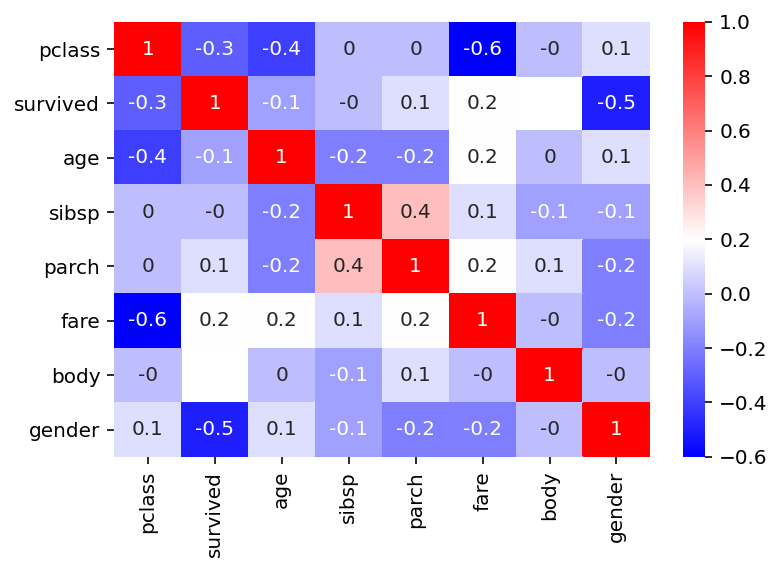

In [58]:
correlation_matrix = titanic.corr().round(1)
sns.heatmap(data=correlation_matrix, annot=True, cmap='bwr')

#### 4.6 먼저 특성을 선택하고, 데이터를 나누자

In [60]:
from sklearn.model_selection import train_test_split

x = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'gender']]  # 특성 선정
y = titanic['survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13)

#### 4.7 일단 DecisionTree

In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(max_depth=4, random_state=13)
dt.fit(x_train, y_train)

pred = dt.predict(x_test)
print(accuracy_score(y_test, pred))

0.7655502392344498


## 5. 디카프리오의 생존율은?

#### 5.2 디카프리오의 생존률

In [62]:
import numpy as np

dicaprio = np.array([[3, 18, 0, 0, 5, 1]])
print('Decaprio : ', dt.predict_proba(dicaprio)[0,1])

Decaprio :  0.16728624535315986


#### 5.3 윈슬릿의 생존률

In [63]:
winslet = np.array([[1, 16, 1, 1, 100, 0]])
print('Winslet : ', dt.predict_proba(winslet)[0,1])

Winslet :  1.0


NameError: name 'iris_tree' is not defined